## Regression analysis to predict effect of Unmet Access to Contraception on International Adoption Rate using Ski-kit learn
##### Unmet Access to Contraception is defined as the percentage of women who cannot access contraception in a given location
##### International Adoption Rate is expressed as a raw number per year 

In [2]:
# Import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
c_access_unmet = pd.read_csv('Resources/unmet_vs_adoption.csv')
c_access_unmet.head(20)

,Country,Year,Unmet,Adoptions
0,NaN,NaN,NaN,NaN
1,Albania,2002.0,1.3,NaN
2,Albania,2008.0,12.9,NaN
3,Algeria,2012.0,10.4,NaN
4,Armenia,2000.0,18.1,NaN
5,Armenia,2005.0,19.3,NaN
6,Armenia,2010.0,13.5,NaN
7,Azerbaijan,2001.0,11.5,NaN
8,Azerbaijan,2006.0,15.4,NaN
9,Bangladesh,1993.0,21.6,NaN


In [9]:
c_access_unmet_clean = c_access_unmet.dropna()
c_access_unmet_clean

,Country,Year,Unmet,Adoptions
61,China,1992.0,3.3,206.0
62,China,1997.0,2.7,3597.0
63,China,2001.0,2.3,4705.0
78,Côte d'Ivoire,2011.0,22.2,46.0
86,Democratic Republic of the Congo,2007.0,26.9,69.0
87,Democratic Republic of the Congo,2010.0,24.2,183.0
88,Democratic Republic of the Congo,2013.0,27.7,583.0
119,Ethiopia,2005.0,36.1,1789.0
120,Ethiopia,2010.0,26.3,4385.0
130,Ghana,1988.0,35.2,0.0


In [10]:
c_access_unmet_clean.columns

Index(['Country', 'Year', 'Unmet', 'Adoptions'], dtype='object')

In [11]:
# Assign the data to X and y
X = c_access_unmet_clean["Unmet"].values.reshape(-1,1)
y = c_access_unmet_clean["Adoptions"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (54, 1) (54, 1)


Text(0,0.5,'Adoptions')

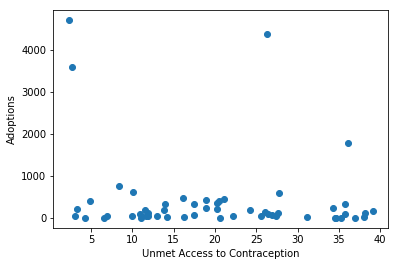

In [12]:
plt.scatter(X, y)
plt.xlabel("Unmet Access to Contraception")
plt.ylabel("Adoptions")

In [13]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [14]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-26.54833227]]
y-axis intercept:  [916.48059952]


In [17]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2.3]]
Max X Value: [[39.1]]


In [18]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [19]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score


# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 1378242.7681832921
R-squared (R2 ): -0.16835745525442025


Text(0,0.5,'Adoptions')

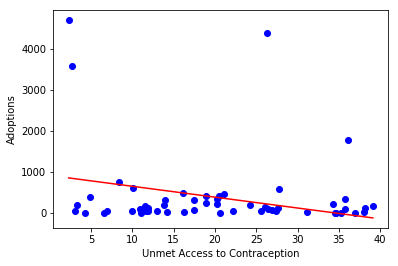

In [21]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Unmet Access to Contraception")
plt.ylabel("Adoptions")